In [5]:
import torch # 파이토치 기본 라이브러리 
import torchvision # 이미지 관련 된 파이토치 라이브러리
from torchvision import datasets # 토치비전에서 제공하는 데이터셋
from torchvision import transforms # 이미지 전처리 기능들을 제공하는 라이브러리
from torch.utils.data import DataLoader # 데이터를 모델에 사용할 수 있도록 적재해 주는 라이브러리
from torch.utils.data import random_split
import numpy as np 
import matplotlib.pyplot as plt

## 1. 파이토치 제공 데이터 사용하기

In [ ]:
transform = transforms.Compose([transforms.RandomHorizontalFlip(p=0.5),
                                transforms.ToTensor()
])

In [ ]:
trainset = datasets.CIFAR10('CIFAR10_data/', download=True, train=True, transform=transform)
testset = datasets.CIFAR10('CIFAR10_data/', download=True, train=False, transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting CIFAR10_data/cifar-10-python.tar.gz to CIFAR10_data/
Files already downloaded and verified


In [ ]:
batch_size = 16
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader =  DataLoader(testset, batch_size=batch_size, shuffle=False)

## 2. 같은 클래스 별로 폴더를 정리한 경우

In [11]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ghyungheejang","key":"a9509ac2b6b6e6ae3f337e5f1069a560"}'}

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# permmision warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog
!unzip cat-and-dog.zip -d catanddog/
data_dir = './catanddog/'

In [ ]:
transform = transforms.Compose([transforms.Resize([256, 256]), transforms.ToTensor()])

In [ ]:
trainset = datasets.ImageFolder(root= data_dir + 'training_set/training_set/', transform=transform)
testset = datasets.ImageFolder(root= data_dir + 'test_set/test_set/', transform=transform)

In [ ]:
trainset

Dataset ImageFolder
    Number of datapoints: 8005
    Root location: ./catanddog/training_set/training_set/
    StandardTransform
Transform: Compose(
               Resize(size=[256, 256], interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )

In [ ]:
batch_size=16
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [ ]:
train_iter = iter(trainloader)
images, labels = next(train_iter)
images.shape, labels.shape

(torch.Size([16, 3, 256, 256]), torch.Size([16]))

## 3. 나만의 데이터셋 만들기 (Cat and Dog 이용)

In [ ]:
# 파이토치에서 제공하는 Dataset 클래스를 활용해 데이터셋 객체를 만들 수 있음
# Dataset은 추상 클래스이며
# 나만의 데이터셋은 Dataset을 상속받은 다음
# 특수 메서드인 __len__()과 __getitem__()을 재정의(오버라이딩)해야 함

# 예시 (아래 패턴을 기억하기!!)
"""
from torch.utils.data import Dataset

class MyDataset(Dataset):
  def __init__(self):

  def __len__(self):

  def __getitem__(self, index):

"""

# __len__() : 데이터셋의 크기를 반환
# __getitem__() : 인덱스를 전달받아 인덱스에 해당하는 데이터를 반환

# __len__(), __getitem__()의 호출 방식 (일반적인 메서드와는 다름)
# __len__()는 len(MyDataset) 형태로 호출
# __getitem__()는 MyDataset[index]

In [ ]:
s = './catanddog/training_set/training_set/cats/cat.2023.jpg'
s.split('/')[-2]

'cats'

In [2]:
from torch.utils.data import Dataset
import glob
import cv2
from PIL import Image # Image.open() : PIL에서 이미지를 읽는 함수

class CatandDogDataset(Dataset):
  def __init__(self, root, transform):
    self.filepaths = glob.glob(root + '*/*.jpg')
    self.transform = transform

  def __len__(self):
    return len(self.filepaths)

  def __getitem__(self, index):
    image_path = self.filepaths[index]
    # pytorch dataset에서는 image 데이터를 PIL 형태로 읽음
    image = Image.open(image_path)    
    image_transformed = self.transform(image)

    # image_path 예시 : ./catanddog/training_set/training_set/cats/cat.2023.jpg
    dir_label = image_path.split('/')[-2]
    if dir_label == 'cats':
      label = 0
    else:
      label = 1
    return image_transformed, label
    

In [ ]:
# torchvision에서 제공하는 전처리
transform = transforms.Compose([transforms.Resize([256, 256]), transforms.ToTensor()])

In [ ]:
trainset = CatandDogDataset(root= data_dir + 'training_set/training_set/', transform=transform)
testset = CatandDogDataset(root= data_dir + 'test_set/test_set/', transform=transform)

In [ ]:
len(trainset), len(testset) # trainset.__len__(), testset.__len__()

(8005, 2023)

In [ ]:
trainset.__len__(), testset.__len__()

(8005, 2023)

In [ ]:
print(type(trainset[300][0]), type(trainset[300][1]))

<class 'torch.Tensor'> <class 'int'>


In [ ]:
trainset[300][0] # trainset.__getitem__(300)[0]
trainset[300][1] # trainset.__getitem__(300)[1]

In [ ]:
trainset.__getitem__(300)[0]

In [ ]:
trainset[300][0].shape

torch.Size([3, 256, 256])

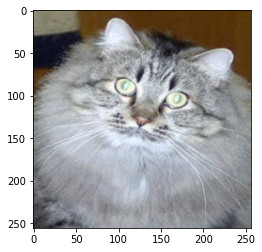

In [ ]:
plt.imshow(trainset[300][0].permute(1, 2, 0))

In [ ]:
trainset[300][1] # 정답 레이블

0

In [ ]:
batch_size=32
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader  = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [ ]:
train_iter = iter(trainloader)
images, labels = next(train_iter) 

grid_image = torchvision.utils.make_grid(images)
plt.figure(figsize=(20, 200))
plt.imshow(grid_image.permute(1, 2, 0))

### (참고) torchvision.transforms 예시

In [ ]:
from google.colab import files
uploaded_img = files.upload()

Saving cactus.png to cactus.png


In [ ]:
# torchvision.transforms
# https://pytorch.org/vision/stable/transforms.html
# Examples

In [ ]:
trans = transforms.Resize((224, 224)) # 사이즈를 변경해주는 전처리기(변환기)
image = Image.open('cactus.png')
resized_image = trans(image) # torchvision의 전처리기(변환기)는 PIL 포맷의 이미지를 기대
resized_image # type은 PIL 포맷

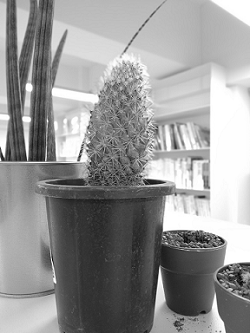

In [ ]:
trans = transforms.Grayscale() # Grayscale로 변환해주는 전처리기(변환기)
image = Image.open('cactus.png')
gray_image = trans(image)
gray_image

In [ ]:
trans = transforms.RandomRotation(degrees=(0, 180)) # Random하게 Rotation 해주는 전처리기(변환기)
image = Image.open('cactus.png')
rotated_image = trans(image)
rotated_image

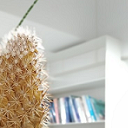

In [ ]:
trans = transforms.RandomCrop(size=(128, 128)) # random하게 Crop 시켜주는 전처리기(변환기)
image = Image.open('cactus.png')
cropped_image = trans(image)
cropped_image

## 4. 외부 전처리기 이용하기 (Albumentation 제공)

In [ ]:
# Albumentation 제공 이미지 전처리기의 장점
# torchvison 변환기와 비교했을 때 처리 속도가 빠르고 더 다양한 이미지 변환을 제공
# Object Detection, Segmentation 에서도 사용 가능

In [14]:
from torch.utils.data import Dataset
import glob
import cv2
from PIL import Image # Image.open() : PIL에서 이미지를 읽는 함수

class CatandDogDataset(Dataset):
  def __init__(self, root, transform):
    self.filepaths = glob.glob(root + '*/*.jpg')
    self.transform = transform

  def __len__(self):
    return len(self.filepaths)

  def __getitem__(self, index):
    image_path = self.filepaths[index]
    # pytorch dataset에서는 image 데이터를 PIL 형태로 읽음
    # image = Image.open(image_path)    
    # image_transformed = self.transform(image)

    # albumentation 전처리기에서는 numpy ndarrary를 기대
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    transformed_data = self.transform(image=image)
 
    # image_path 예시 : ./catanddog/training_set/training_set/cats/cat.2023.jpg
    dir_label = image_path.split('/')[-2]
    if dir_label == 'cats':
      label = 0
    else:
      label = 1
    return transformed_data['image'], label
    

In [15]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [16]:
transform = A.Compose([A.Resize(224, 224), ToTensorV2()]) # 이미지 사이즈 조정 -> 텐서로 변환
# torchvision에서는 tensor로 변환을 하면 정규화까지 같이 해줌
# albumentation에서는 tensor로 변환만 해주고 정규화는되어 있지 않음

In [17]:
trainset = CatandDogDataset(root= data_dir + 'training_set/training_set/', transform=transform)
testset = CatandDogDataset(root= data_dir + 'test_set/test_set/', transform=transform)

In [18]:
len(trainset)

8005

In [19]:
trainset[300][0].shape

torch.Size([3, 224, 224])

In [20]:
batch_size=32
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader  = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [21]:
train_iter = iter(trainloader)
images, labels = next(train_iter) 

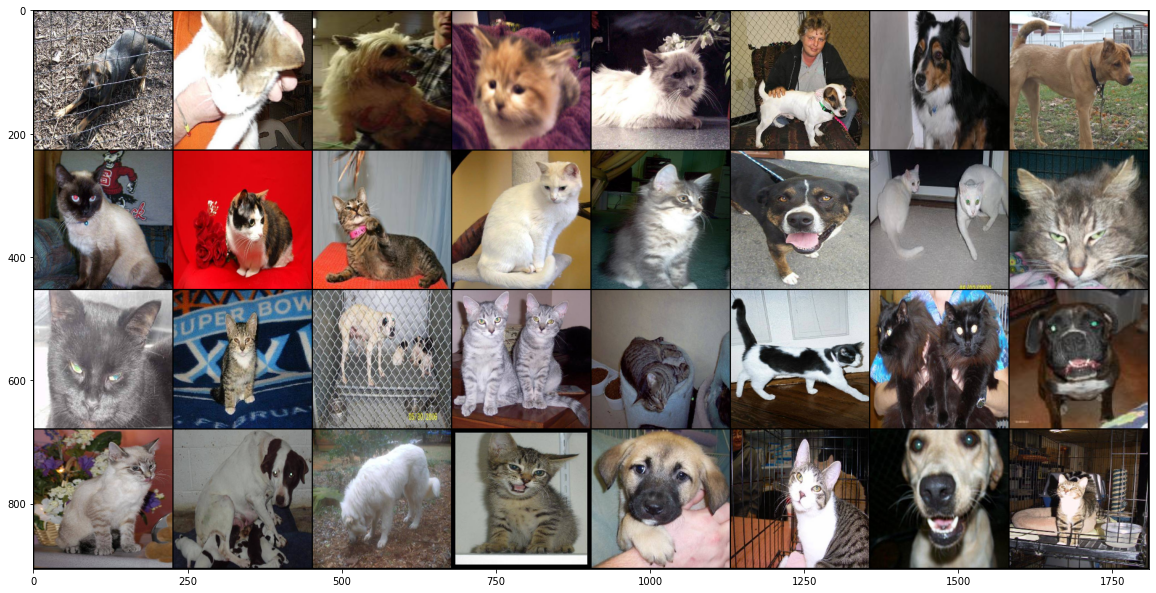

In [22]:
grid_image = torchvision.utils.make_grid(images)
plt.figure(figsize=(20, 200))
plt.imshow(grid_image.permute(1, 2, 0))

### (참고) Albumentation 제공 전처리기 예시

In [ ]:
# Tutorial
# https://albumentations.ai/docs/getting_started/image_augmentation/
# https://albumentations.ai/docs/examples/example/

In [1]:
from google.colab import files
uploaded_img = files.upload()

Saving dog.png to dog.png


(558, 557, 3)


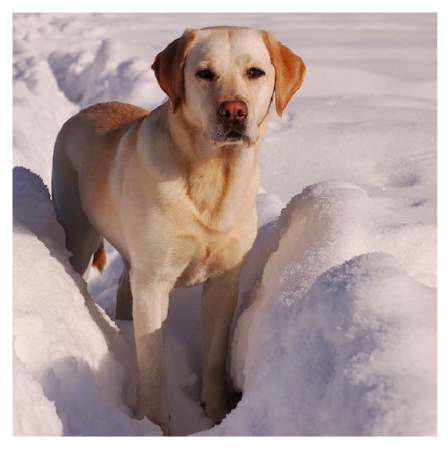

In [6]:
image = cv2.imread('dog.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def show_image(image):
  plt.figure(figsize=(8, 8))
  plt.imshow(image)
  plt.axis('off')

show_image(image)  
print(image.shape) # height x width x channels

#### 1. Resize : 이미지 크기를 조절하는 변환기 (높이, 너비)

(450, 650, 3)


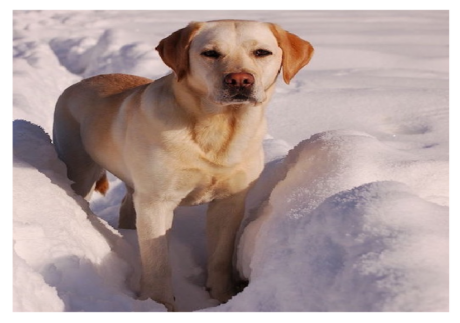

In [7]:
augmentor = A.Resize(450, 650)
aug_img = augmentor(image=image)['image'] # Albumentation에서는 image 뿐만 아니라 label도 전처리 가능
                                          # augmentor(image=image, lable=label)
show_image(aug_img)
print(aug_img.shape)

#### 2. RandomBrightnessContrast : 이미지 밝기와 대비를 조절하는 변환기

(558, 557, 3)


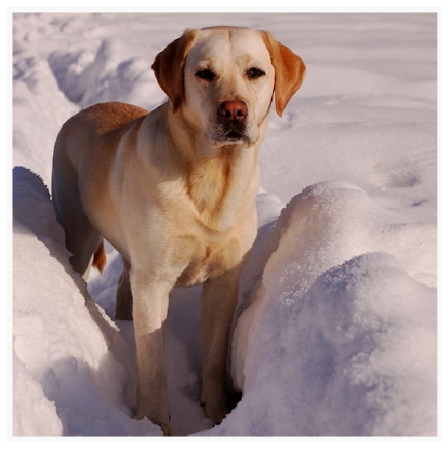

In [8]:
augmentor = A.RandomBrightnessContrast(brightness_limit=0.2, # -0.2~0.2 범위에서 임의로 밝기 조절. -1(검은색), 1(흰색)
                           contrast_limit=0.2, # brightness_limit와 동작 방식 동일
                           p= 0.3) # 적용 확률로 설정. 0.3이면 30%의 확률로 변환기를 적용
aug_img = augmentor(image=image)['image']
show_image(aug_img)
print(aug_img.shape)


In [9]:
def show_images(images, labels, ncols=4, title=None):
  figure, axes = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
  for i in range(ncols):
    axes[i].imshow(images[i])
    axes[i].set_title(labels[i])

def repeat_aug(count=4, org_image=None, label=None, augmentor=None):
  image_list = [org_image]
  label_list = ['Original']

  for i in range(count):
    aug_image = augmentor(image=org_image)["image"]
    image_list.append(aug_image)
    label_list.append(label)
  show_images(image_list, label_list, ncols= count+1)


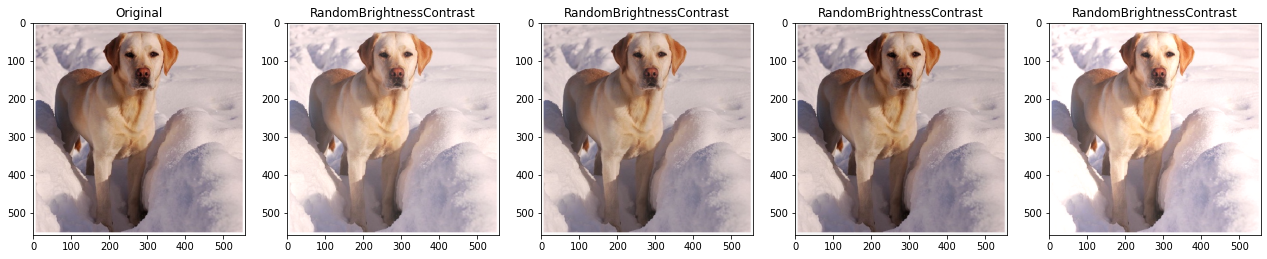

In [10]:
augmentor = A.RandomBrightnessContrast(brightness_limit=0.2, # -0.2~0.2 범위에서 임의로 밝기 조절. -1(검은색), 1(흰색)
                           contrast_limit=0.2, # brightness_limit와 동작 방식 동일
                           p= 0.5) # 적용 확률로 설정. 0.3이면 30%의 확률로 변환기를 적용
repeat_aug(count=4, org_image=image, label='RandomBrightnessContrast', augmentor=augmentor)                           

#### 3. VerticalFlip : 상하 대칭 변환

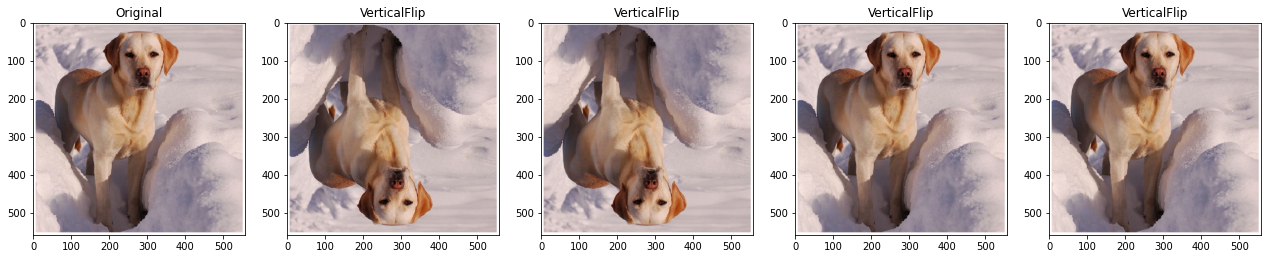

In [23]:
augmentor = A.VerticalFlip(p=0.2)
repeat_aug(count=4, org_image=image, label='VerticalFlip', augmentor=augmentor)

#### 4. HorizontalFlip : 좌우 대칭 변환

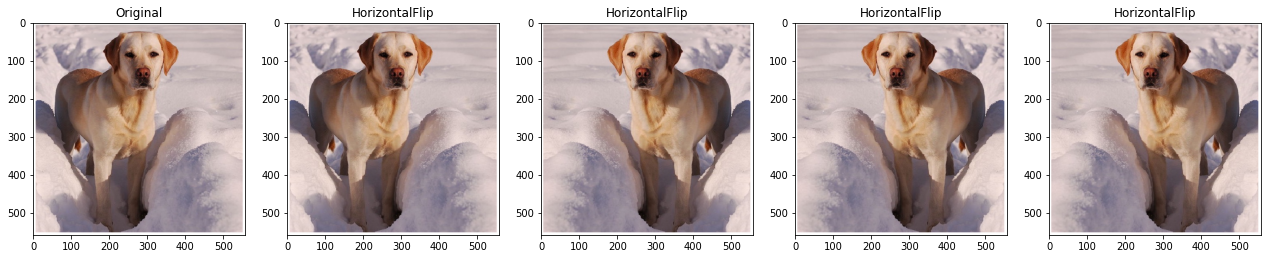

In [24]:
augmentor = A.HorizontalFlip(p=0.5)
repeat_aug(count=4, org_image=image, label='HorizontalFlip', augmentor=augmentor)

#### 5. ShiftScaleRotate : 이동, 스케일링, 회전 변환

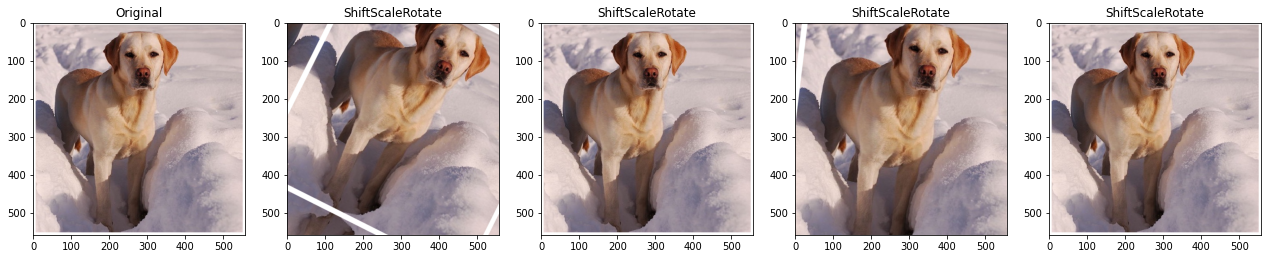

In [25]:
augmentor = A.ShiftScaleRotate(shift_limit=0.1, # -0.1~0.1 범위에서 무작위로 선택해서 이동을 조절
                               scale_limit=0.2, # -0.2~0.2 범위에서 무작위로 선택해서 스케일을 조정
                               rotate_limit=30, # -30~30도 범위에서 무작위로 선택해서 회전을 조절
                               p=0.5)
repeat_aug(count=4, org_image=image, label='ShiftScaleRotate', augmentor=augmentor)

#### 6. Blur : 블러 효과,  AdvancedBlur : 가우시안 블러 효과

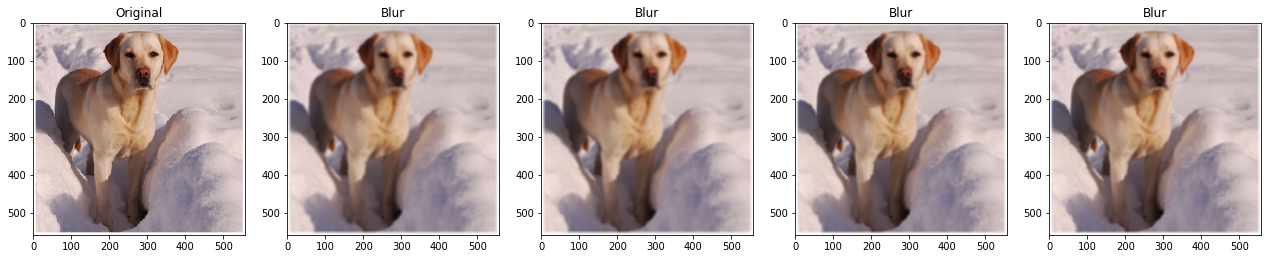

In [27]:
augmentor = A.Blur(p=1, blur_limit=(7, 10))
repeat_aug(count=4, org_image=image, label='Blur', augmentor=augmentor)

#### 7. OneOf : 한가지만 선택

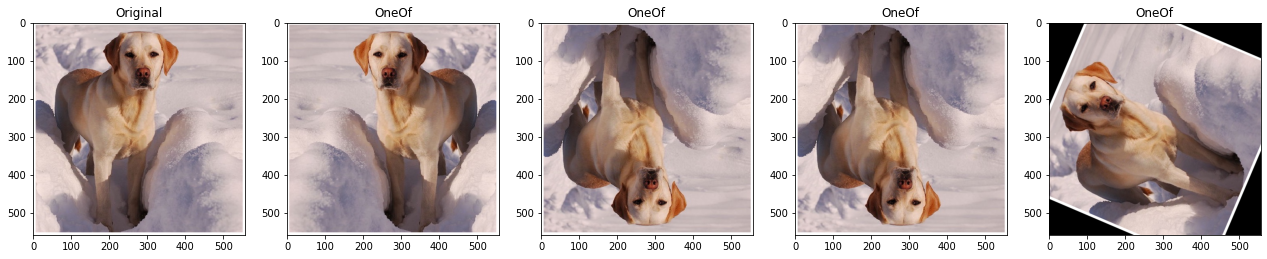

In [29]:
augmentor = A.OneOf([
                     A.VerticalFlip(p=1),
                     A.HorizontalFlip(p=1),
                     A.Rotate(limit=(45, 90), p=1, border_mode=cv2.BORDER_CONSTANT)], p=1)
repeat_aug(count=4, org_image=image, label='OneOf', augmentor=augmentor)

#### 8. Normalize

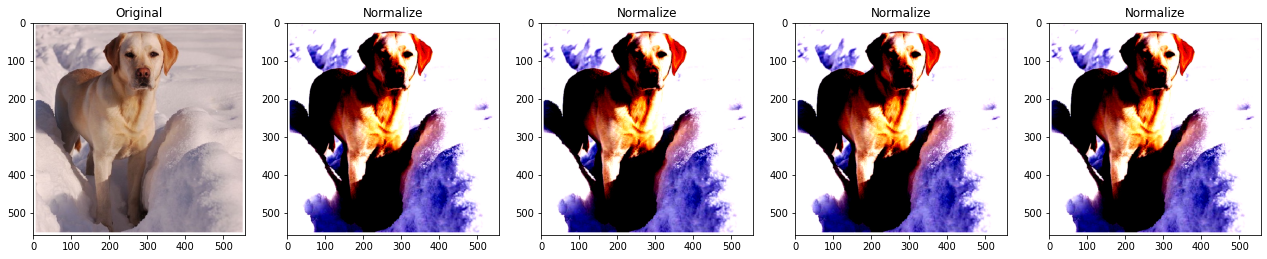

In [30]:
augmentor = A.Normalize() # 이미지넷 데이터의 평균과 표준편차로 기본값 설정
                          # mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
repeat_aug(count=4, org_image=image, label='Normalize', augmentor=augmentor)

## 5. 나만의 전처리기 만들기

In [34]:
class CatandDogDataset(Dataset):
  def __init__(self, root, transform):
    self.filepaths = glob.glob(root + '*/*.jpg')
    self.transform = transform

  def __len__(self):
    return len(self.filepaths)

  def __getitem__(self, index):
    image_path = self.filepaths[index]
    # pytorch dataset에서는 image 데이터를 PIL 형태로 읽음
    image = Image.open(image_path)    
    image_transformed = self.transform(image) # 나만의 전처리기로 연결

    # image_path 예시 : ./catanddog/training_set/training_set/cats/cat.2023.jpg
    dir_label = image_path.split('/')[-2]
    if dir_label == 'cats':
      label = 0
    else:
      label = 1
    return image_transformed, label
    

In [35]:
# torchvision 에서 제공하는 전처리기
# transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

In [36]:
# 위의 torchvision 전처리기와 유사한 나만의 변환기 만들기

In [43]:
# transforms.ToTensor() 형태의 변환기 만들기
# --> 1. 입력이미지를 0~1사이로 정규화하고,  2.Tensor 형태로 바꿈(channel x height x width)

# __call__ 함수는 클래스를 호출할 수 있도록 하는 메서드
class MyToTensor:
  def __call__(self, input):
    # 입력 이미지가 PIL 형태로 들어옴
    np_input = np.array(input)
    norm_input = np_input/255 # 실수 0~1사이로 변환
    tensor_input = torch.FloatTensor(norm_input) # Float Type Tensor로 변환
    tensor_input = tensor_input.permute(2, 0, 1) # tensor : channel x height x width 로 변환
    return tensor_input    

In [44]:
trainset = CatandDogDataset(root= data_dir + 'training_set/training_set/', transform=MyToTensor())
testset = CatandDogDataset(root= data_dir + 'test_set/test_set/', transform=MyToTensor())

In [46]:
trainset[0][0].size()

torch.Size([3, 225, 299])

In [47]:
# transforms.Resize((224, 224)) 형태의 변환기 만들기
# --> 입력이미지를 resize 해주는 기능

# __call__ 함수는 클래스를 호출할 수 있도록 하는 메서드
class MyResize:
  def __init__(self, output_size):
    self.output_size = output_size

  def __call__(self, input):
    # 입력 이미지가 PIL 형태로 들어옴
    np_input = np.array(input)
    output_h, output_w = self.output_size
    resized_image = cv2.resize(np_input, (output_w, output_h)) # opencv의 cv2.resize (image, (w, h)))
    return resized_image

In [48]:
trainset = CatandDogDataset(root= data_dir + 'training_set/training_set/', transform=MyResize((150, 300))) # height x width
testset = CatandDogDataset(root= data_dir + 'test_set/test_set/', transform=MyResize((150, 300))) # height x width

In [50]:
trainset[0][0].shape

(150, 300, 3)

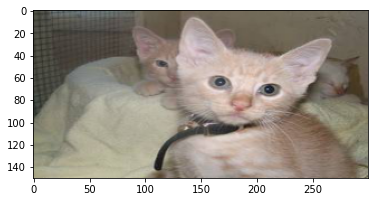

In [51]:
plt.imshow(trainset[0][0])

In [52]:
# 나만의 전처리기
transform = transforms.Compose([MyResize((224, 224)), MyToTensor()])

In [53]:
trainset = CatandDogDataset(root= data_dir + 'training_set/training_set/', transform=transform)
testset = CatandDogDataset(root= data_dir + 'test_set/test_set/', transform=transform) 

In [55]:
trainset[0][0].shape

torch.Size([3, 224, 224])

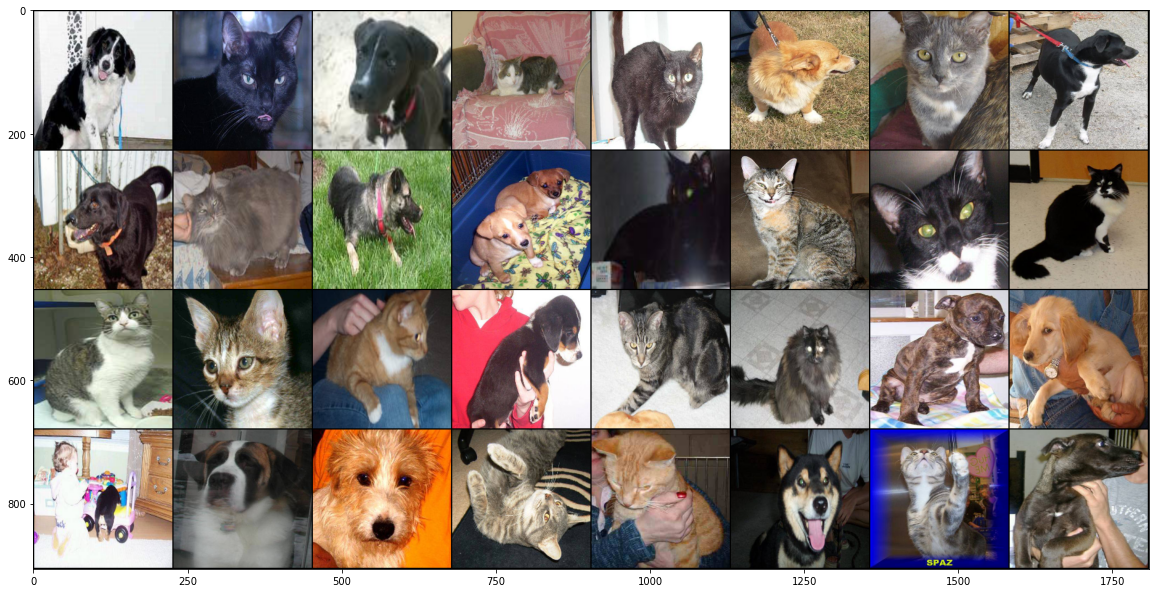

In [56]:
batch_size=32
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader  = DataLoader(testset, batch_size=batch_size, shuffle=False)

train_iter = iter(trainloader)
images, labels = next(train_iter) 

grid_image = torchvision.utils.make_grid(images)
plt.figure(figsize=(20, 200))
plt.imshow(grid_image.permute(1, 2, 0))